# Drawing the scatter plot of RIP-seq

In [1]:
import numpy as np
import pandas as pd 

In [2]:
PUM1 = pd.read_table("C:/Users/Toshimichi Yamada/OneDrive/PUM_paper/data/PUM1_RNA_BRIC_RIP_seq.txt")
PUM2 = pd.read_table("C:/Users/Toshimichi Yamada/OneDrive/PUM_paper/data/PUM2_RNA_BRIC_RIP_seq.txt")

In [3]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
PUM1

,gr_id,symbol,refid,rpkm_CTRL,rpkm_PUM,change_rpkm,q_rpkm,hl_CTRL,hl_PUM1,change_bric,p_BRIC,rip_ev,rip_PUM1,change_rip,q_rip
0,1,A1BG,NM_130786,0.011698,0.022679,0.955057,1.000000,NaN,NaN,NaN,NaN,0.024701,0.000000,#NAME?,1.000000
1,2,A1CF,NM_014576,0.048423,0.057783,0.254932,1.000000,NaN,NaN,NaN,NaN,0.021598,0.016016,-0.431394,1.000000
2,3,A2M,NM_000014,0.098657,0.004655,-4.40572,1.000000,NaN,NaN,NaN,NaN,0.008683,0.008367,-0.0536261,1.000000
3,4,A2ML1,NM_001282424,0.035706,0.044105,0.304793,1.000000,NaN,NaN,NaN,NaN,0.061852,0.031062,-0.993659,1.000000
4,5,A3GALT2,NM_001080438,0.000000,0.000000,0,1.000000,NaN,NaN,NaN,NaN,0.025169,0.000000,#NAME?,1.000000
5,6,A4GALT,NM_017436,3.146190,4.438100,0.496339,0.110124,3.083820,3.254447,0.077694,0.9237414,7.900380,2.051110,-1.94552,0.004051
6,7,A4GNT,NM_016161,0.000000,0.000000,0,1.000000,NaN,NaN,NaN,NaN,0.000000,0.005626,inf,1.000000
7,8,AAAS,NM_015665,61.837100,46.659100,-0.406315,0.031878,15.349410,14.726040,-0.059814,0.9323892,50.644700,7.948840,-2.6716,0.000228
8,9,AACS,NM_023928,18.120600,18.559800,0.034543,0.946928,8.555127,9.773910,0.192146,0.6937284,16.092900,18.001800,0.161718,0.812466
9,10,AADAC,NM_001086,0.000000,0.010649,inf,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0,1.000000


## definition of PUM binding transcripts  
1. Express in HeLa : rpkm_CTRL >1  
2. significant increase in RIP-seq : q_rip < 0.05, change_rip > 0, rip_PUM1 >1

In [4]:
PUM1_express = PUM1[PUM1["rpkm_CTRL"] > 1]
PUM1_rip1 = PUM1_express[PUM1_express["q_rip"] < 0.05]
PUM1_rip1["change_rip"] = PUM1_rip1["change_rip"].apply(pd.to_numeric) # there is string in the column
PUM1_RIP2 = PUM1_rip1[PUM1_rip1["change_rip"] > 0]
PUM1_RIP = PUM1_RIP2[PUM1_RIP2['rip_PUM1'] > 1]

PUM2_express = PUM2[PUM2["rpkm_CTRL"] > 1]
PUM2_rip1 = PUM2_express[PUM2_express["q_rip"] < 0.05]
PUM2_rip1["change_rip"] = PUM2_rip1["change_rip"].apply(pd.to_numeric) # there is string in the column
PUM2_RIP2 = PUM2_rip1[PUM2_rip1["change_rip"] > 0]
PUM2_RIP = PUM2_RIP2[PUM2_RIP2['rip_PUM1'] > 1]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
PUM1_RIP

,gr_id,symbol,refid,rpkm_CTRL,rpkm_PUM,change_rpkm,q_rpkm,hl_CTRL,hl_PUM1,change_bric,p_BRIC,rip_ev,rip_PUM1,change_rip,q_rip
14,15,AAED1,NM_153698,10.06880,9.989370,-0.0114277,0.989300,3.878277,4.999450,0.366354,0.256426,11.455700,67.32090,2.55499,0.000228
18,19,AAMP,NM_001087,73.64450,77.933400,0.0816635,0.825738,8.983396,10.363060,0.206118,0.7251787,66.026500,329.75100,2.32026,0.000228
59,60,ABCC5,NM_005688,19.08550,19.667200,0.0433177,0.941056,2.845839,2.832172,-0.006945,0.9772356,10.468700,45.61350,2.12338,0.000937
67,68,ABCE1,NM_002940,33.78100,37.309300,0.143322,0.626954,6.615325,6.249539,-0.082062,0.8635941,4.704630,13.41210,1.51139,0.048572
77,78,ABHD10,NM_018394,11.54220,15.405000,0.416488,0.041012,2.269189,3.085705,0.443424,0.4031063,5.774360,27.61130,2.25753,0.000422
81,82,ABHD13,NM_032859,1.85838,2.065450,0.152407,0.732521,1.512773,1.101026,-0.458347,0.7609699,1.264030,4.58627,1.85929,0.003040
88,89,ABHD17B,NM_001025780,5.29427,6.077560,0.19906,0.632134,1.090672,1.236230,0.180730,0.2280614,1.641660,19.00280,3.53299,0.000228
89,90,ABHD17C,NM_021214,4.84965,3.981410,-0.2846,0.400612,2.309183,3.354560,0.538741,0.2330743,3.814930,72.77640,4.25374,0.000228
100,101,ABL1,NM_005157,25.14080,28.337100,0.17266,0.513555,2.344051,2.438186,0.056805,0.8907146,22.630200,81.13450,1.84207,0.002642
101,102,ABL2,NM_001168239,4.91881,4.836150,-0.0244523,0.967817,1.805346,2.195610,0.282347,0.7258547,1.752290,13.72350,2.96933,0.000228


In [5]:
plt.style.use('publishable_style')
from matplotlib.ticker import * # to modify locator position
from matplotlib import ticker

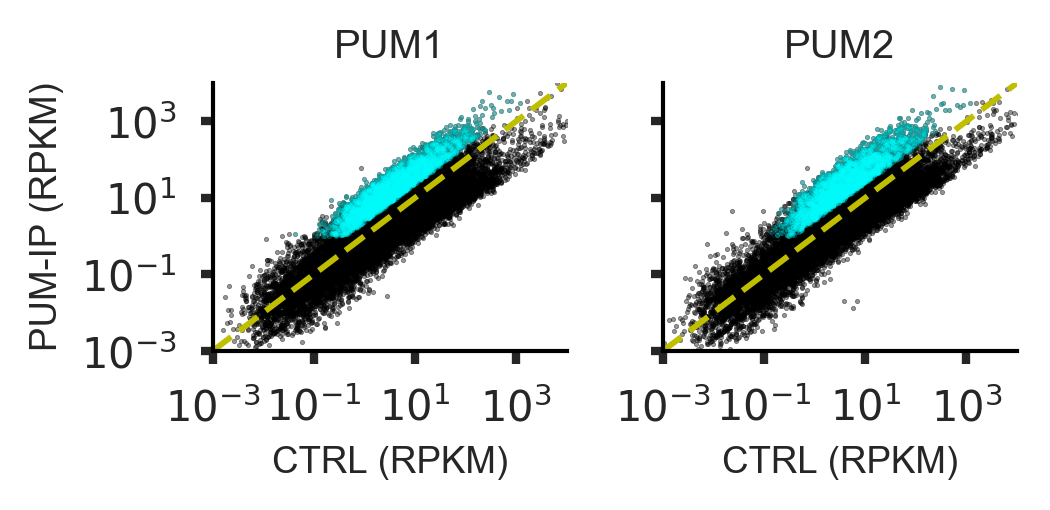

In [15]:
#matplotlib.rcParams.update({'axes.labelsize': 5})

fig = plt.figure(figsize =(3.6,1.8), dpi=300)     # figure full size is 8.5*11 inch
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey = ax1)

ax1.scatter(PUM1['rip_ev'], PUM1['rip_PUM1'], s = 1, alpha = 0.4, c = 'k')
ax1.scatter(PUM1_RIP['rip_ev'], PUM1_RIP['rip_PUM1'], s = 1, alpha = 0.2, c = 'cyan')
ax1.set_xlim(0.001, 10000)
ax1.set_ylim(0.001, 10000)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('PUM1')
ax1.set_xlabel("CTRL (RPKM)")
ax1.set_ylabel("PUM-IP (RPKM)")

ax1.xaxis.set_ticks(np.logspace(-3, 5, num = 4,endpoint=False, base = 10)) # logspace(start, end, stepsize, base)
ax1.yaxis.set_ticks(np.logspace(-3, 5, num = 4,endpoint=False, base = 10)) # logspace(start, end, stepsize, base)


ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="--", c="y")

ax2.scatter(PUM2['rip_ev'], PUM2['rip_PUM1'], s = 1, alpha = 0.4, c = 'k')
ax2.scatter(PUM2_RIP['rip_ev'], PUM2_RIP['rip_PUM1'], s = 1, alpha = 0.2, c = 'cyan')
ax2.set_xlim(0.001, 10000)
ax2.set_ylim(0.001, 10000)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('PUM2')
ax2.set_xlabel("CTRL (RPKM)")

ax2.xaxis.set_ticks(np.logspace(-3, 5, num = 4,endpoint=False, base = 10)) # logspace(start, end, stepsize, base)
ax2.yaxis.set_ticks(np.logspace(-3, 5, num = 4,endpoint=False, base = 10)) # logspace(start, end, stepsize, base)


ax2.tick_params(labelleft="off")

ax2.plot(ax2.get_xlim(), ax2.get_ylim(), ls="--", c="y")

fig.tight_layout()

fig.savefig('C:/Users/Toshimichi Yamada/OneDrive/PUM_paper/data/PUM_RIP_scatter2.png')

## Compare the IP-enrichment between PUM1 and PUM2

In [16]:
PUM1_rip = PUM1[PUM1['rip_PUM1'] > 1]
PUM2_rip = PUM2[PUM2['rip_PUM1'] > 1]

In [17]:
# merge data
PUM1_rip_s = PUM1_rip.loc[:,['symbol', 'change_rip']]
PUM2_rip_s = PUM2_rip.loc[:,['symbol', 'change_rip']]

PUM2_rip_s = PUM2_rip_s.rename(columns={'change_rip':'change_rip2'})

In [18]:
PUM12 = pd.merge(PUM1_rip_s, PUM2_rip_s, on= 'symbol')

In [19]:
PUM12

,symbol,change_rip,change_rip2
0,A4GALT,-1.94552,-1.79144
1,AAAS,-2.6716,-1.73413
2,AACS,0.161718,-0.0770276
3,AADAT,-0.823081,-0.518174
4,AAED1,2.55499,2.73987
5,AAGAB,-0.990086,-1.24623
6,AAMDC,-1.75324,-2.36101
7,AAMP,2.32026,2.44439
8,AAR2,0.264997,0.298339
9,AARS,-1.37158,-1.09553


In [19]:
PUM12["change_rip"] = PUM12["change_rip"].apply(pd.to_numeric) # there is string in the column
PUM12["change_rip2"] = PUM12["change_rip2"].apply(pd.to_numeric) # there is string in the column

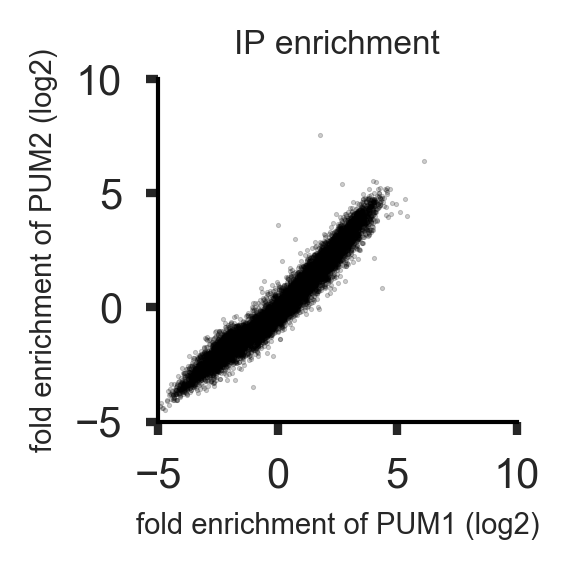

In [22]:
#matplotlib.rcParams.update({'axes.labelsize': 5})

fig1 = plt.figure(figsize =(2,2), dpi=300)     # figure full size is 8.5*11 inch
ax3 = fig1.add_subplot(111)

#ax3.grid(color='gray', linestyle='dashed', alpha =0.5)

ax3.scatter(PUM12['change_rip'], PUM12['change_rip2'], s = 1, alpha = 0.2, c = 'k')
ax3.set_xlim(-5, 10)
ax3.set_ylim(-5, 10)
ax3.set_title('IP enrichment', fontsize=8)
ax3.set_xlabel("fold enrichment of PUM1 (log2)", fontsize=7)
ax3.set_ylabel("fold enrichment of PUM2 (log2)", fontsize=7)

ax3.xaxis.set_ticks(np.arange(-5,11,5)) # arange(start, end, stepsize)


fig1.tight_layout()

fig1.savefig('C:/Users/Toshimichi Yamada/OneDrive/PUM_paper/data/PUM1_PUM2_RIP_scatter.png')

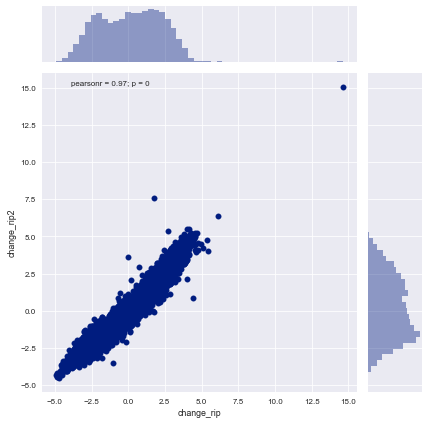

In [26]:
sns.jointplot(x='change_rip', y='change_rip2', data= PUM12)